# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

In [1]:
import pandas as pd

In [20]:
import numpy as np

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



In [ ]:
#1
df = pd.read_csv('datasets_calificaciones.csv')

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [ ]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [ ]:
#2
df.describe()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


In [9]:
#3
df['estudiante'] = df['estudiante'].str.title().str.strip()
df['Materia'] = df['Materia'].str.title().str.strip()
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95%
1,Carlos López,Fisica,6.2,7,NaN,88%
2,María Gómez,Quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6,7,75
4,Laura Vargas,Matematicas,,9.2,8.5,92%


In [10]:
#3
df['Asistencia'] = df['Asistencia'].astype(str).str.replace('%', '').str.strip()
df['Asistencia'] = pd.to_numeric(df['Asistencia'], errors='coerce')
df['Asistencia'] = df['Asistencia'].clip(upper=100)
df['Asistencia'] = df['Asistencia'].astype(int).astype(str) + '%'

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95%
1,Carlos López,Fisica,6.2,7,NaN,88%
2,María Gómez,Quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6,7,75%
4,Laura Vargas,Matematicas,,9.2,8.5,92%


In [15]:
#valores nulos
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].apply(pd.to_numeric, errors='coerce')
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].fillna(0)

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,0.0,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75%
4,Laura Vargas,Matematicas,0.0,9.2,8.5,92%


In [ ]:
#3
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].replace(0, np.nan)

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,NaN,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75%
4,Laura Vargas,Matematicas,NaN,9.2,8.5,92%


In [23]:
#4
df.describe()

,Parcial 1,Parcial 2,Final
count,88.000000,88.000000,85.000000
mean,7.831818,7.830682,7.894118
std,1.209877,1.182959,1.206269
min,5.500000,5.800000,5.700000
25%,6.975000,6.875000,7.000000
50%,7.900000,7.700000,7.800000
75%,8.900000,8.900000,9.000000
max,9.900000,9.900000,9.900000


In [ ]:
#4
print(df['Materia'].unique())

['Matematicas' 'Fisica' 'Quimica' 'Historia' 'Ciencias Sociales'
 'Literatura Universal' 'Programacion Basica']


In [24]:
#4
df.groupby('Materia')[['Parcial 1', 'Parcial 2', 'Final']].mean()

,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.500000,9.100000,NaN
Fisica,6.242105,6.709524,6.569565
Historia,7.375000,6.991304,7.400000
Literatura Universal,8.000000,7.800000,8.200000
Matematicas,8.168421,8.464706,8.580952
Programacion Basica,NaN,5.900000,6.300000
Quimica,9.204167,9.195833,9.326316


In [ ]:
#5
import matplotlib.pyplot as plt

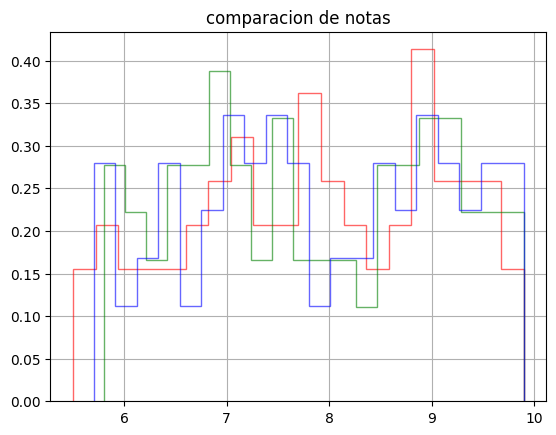

In [52]:
plt.hist(df['Parcial 1'].dropna(), bins=20, alpha=0.6, edgecolor='red', label='Parcial 1', density=True, histtype="step")
plt.hist(df['Parcial 2'].dropna(), bins=20, alpha=0.6, edgecolor='green', label='Parcial 2', density=True, histtype="step")
plt.hist(df['Final'].dropna(), bins=20, alpha=0.6, edgecolor='blue', label='Final', density=True, histtype="step")
plt.title('comparacion de notas')
plt.grid(True)
plt.show()


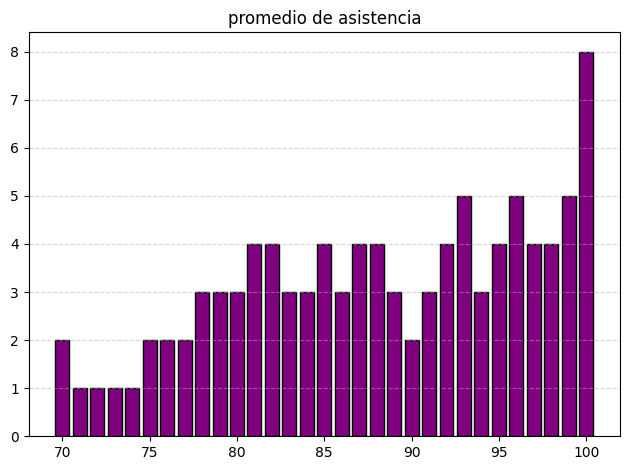

In [50]:
asistencia = df['Asistencia'].round().value_counts().sort_index()

plt.bar(asistencia.index, asistencia.values, color='purple', edgecolor='black')
plt.title('promedio de asistencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [56]:
import sqlite3

conn = sqlite3.connect('calificaciones.db')

df.to_sql('calificaciones', conn, if_exists='replace', index=False)

conn.close()